In [57]:
from sklearn.datasets import make_classification
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

%matplotlib inline

In [38]:
X,y = make_classification(
    n_samples=1000,
    n_features=2,
    n_informative=2,
    n_redundant=0,
    n_classes=2,
    n_clusters_per_class=1,
    random_state=41,
    hypercube=False,
    class_sep=10)

In [39]:
def perceptron(X,y, lr=0.1, n_iter=1000):
    X = np.insert(X,0,1,axis=1) # adding bias term

    # weights initialization
    weights = np.random.rand(X.shape[1])
    history = []
    errors = []
    accuracy = []

    

    for i in range(n_iter):
        correct_predictions = 0
        for j in range(X.shape[0]):  # iterate through all samples
            y_pred = 1 if np.dot(X[j], weights) > 0 else 0
            error = y[j] - y_pred
            weights += lr * error * X[j]
            correct_predictions += (y_pred == y[j])
        
        # storing weights and accuracy for each epoch
        history.append(weights.copy())
        acc = correct_predictions / X.shape[0]
        accuracy.append(acc)
        
    return weights[0], weights[1:], history, accuracy  # returning bias and weights separately

In [40]:
intercept_, coef_, history, accuracy = perceptron(X,y)

In [34]:
print("Intercept (bias):", intercept_)
print("Coefficients (weights):", coef_)

Intercept (bias): 0.9237150205333461
Coefficients (weights): [-0.02195711 -0.42574296]


In [90]:
def plot_decision_boundaries_progression(X, y, history, interval,accuracy):
    # Calculate the number of subplots needed
    num_plots = len(range(0, len(history), interval))
    n_cols = int(np.ceil(np.sqrt(num_plots)))
    n_rows = (num_plots + n_cols -1) // n_cols
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, n_rows * 4), sharex=True, sharey=True)
    axes = axes.flatten()  # Flatten the axes array for easy indexing
    
    # Set the plot limits
    xlim = (X[:, 0].min() - 1, X[:, 0].max() + 1)
    ylim = (X[:, 1].min() - 1, X[:, 1].max() + 1)
    xx = np.linspace(xlim[0], xlim[1], 100)
    
    # Plot decision boundaries at regular intervals
    for i, epoch in enumerate(range(0, len(history), interval)):
        ax = axes[i]
        ax.scatter(X[:, 0], X[:, 1], c=y, cmap='tab20c', alpha=0.7)
        weights = history[epoch]

        intercept_ = weights[0]
        coef_ = weights[1:]
        yy = -(intercept_ + coef_[0] * xx) / coef_[1]
        ax.plot(xx, yy, 'k-', lw=2)
        ax.set_xlim(xlim)
        ax.set_ylim(ylim)
        ax.set_title(f'Epoch {epoch+1}\nAccuracy: {accuracy[epoch]*100:.2f}%')
    
    for j in range(i + 1, len(axes)):
        axes[j].axis('off')
    
    fig.suptitle('Progression of Decision Boundaries with Accuracies', fontsize=16)
    plt.tight_layout()
    plt.show()

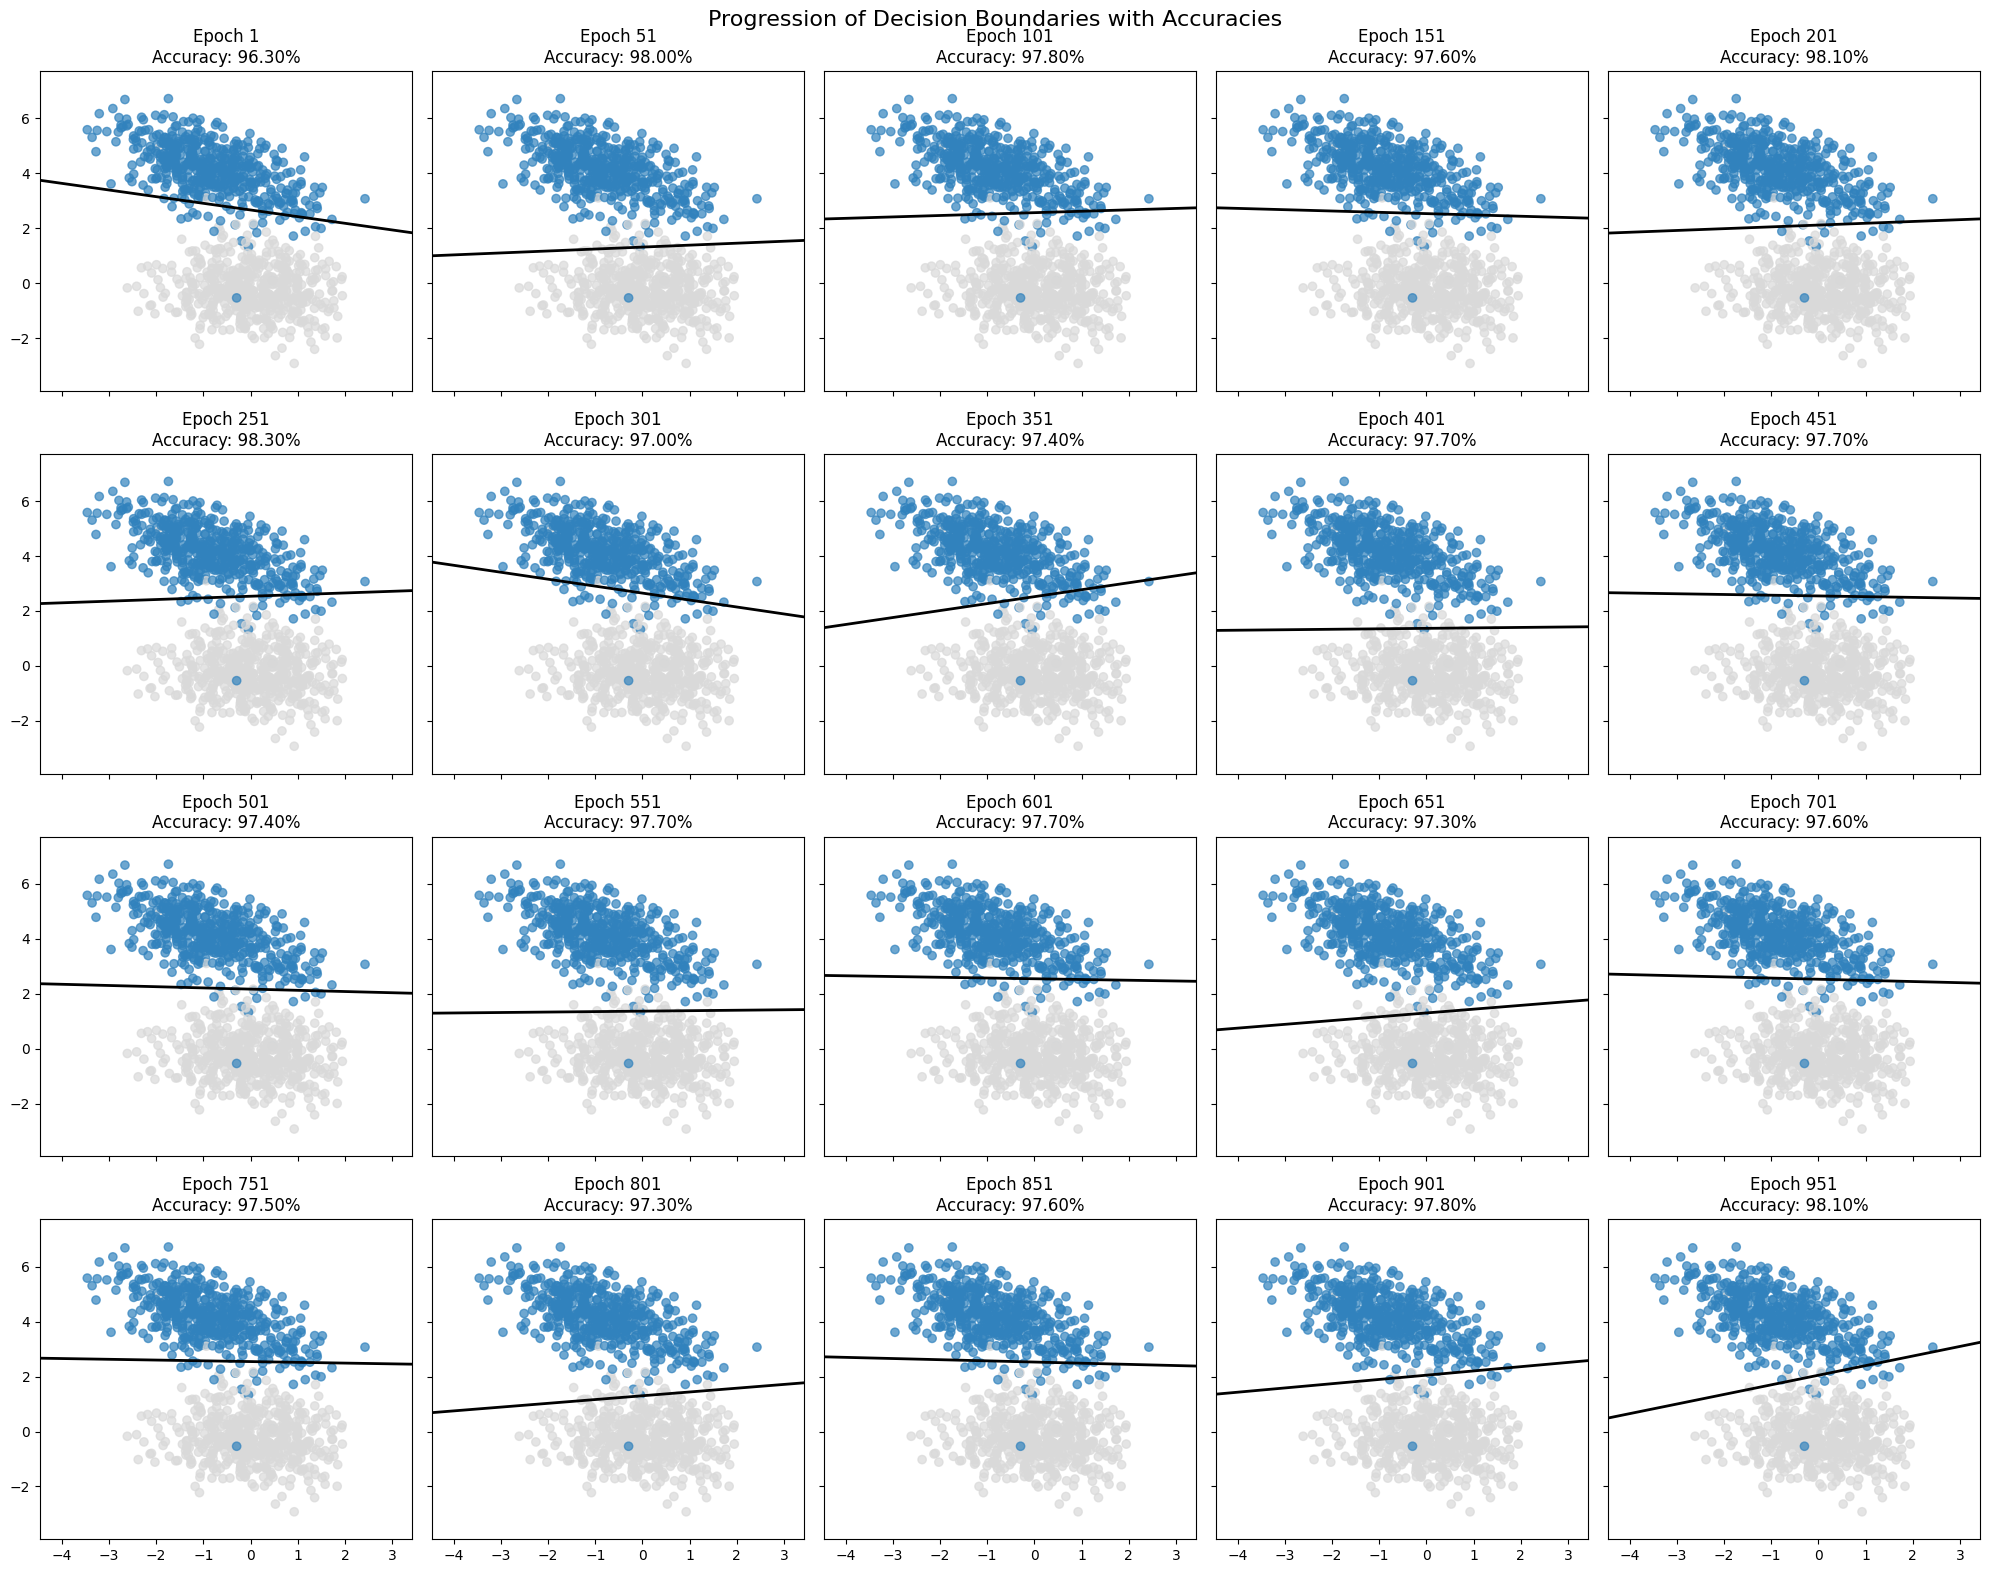

In [91]:
plot_decision_boundaries_progression(X,y,history,interval=50, accuracy=accuracy)

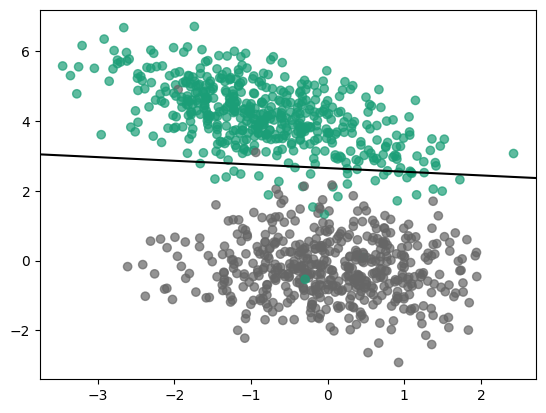

In [85]:
# plotting the data and decision boundary
fig, axes = plt.subplots()
axes.scatter(X[:,0], X[:,1], c=y, cmap='Dark2', alpha = 0.7)
xlim = axes.get_xlim()
ylim = axes.get_ylim()
xx = np.linspace(xlim[0], xlim[1], 100)
yy = -(intercept_ + coef_[0] * xx) / coef_[1]
axes.plot(xx, yy, 'k-')
axes.set_xlim(xlim)
axes.set_ylim(ylim)
plt.show()
